 # <br><br><span style="color:rebeccapurple">Unsupervised learning</span>

Unsupervised learning learns patterns from unlabeled data.
   
An important method in unsupervised learning is cluster analysis. The goal of clustering is to group objects based on their similarities and uncover some patterns in the data. 

Clustering approaches can be classified into two categories:
- Hard clustering: a data point either belongs exclusively to a cluster, or doesn’t.
- Soft clustering: a probability score is assigned to data points to be in the clusters.

There isn't a clear criterion for good clustering. Your data are unlabeled, so there isn't any "gold standard" to compare your model performance against. Different clustering models use different metrics to group samples together. The choice of model will depend on your goal and data. 

Some popular models include:
- Connectivity: e.g. hierarchical clustering, which uses distance connectivity among data points
- Centroid: e.g. K-means clustering, which represents each cluster with a centroid, or single mean vector
- Distribution: e.g. Gaussian mixture model(GMM), which assumes data is composed of Guassian distributions
- Density: e.g. Density-Based Spatial Clustering of Applications with Noise (DBSCAN), which connects data points based on a density criteria (minimum number of objects within a radius)
- etc.

One thing you can consider when choosing models is the size of your dataset. Not all models scale effiiciently to large datasets. K-Means is one of the most popular algorithms and it is scale-efficient (scales linearly with the number of samples).

We are going to focus on K-Means clustering for this workshop. 

# <br><br><span style="color:rebeccapurple">K-means clustering</span>

The K-means algorithm divides the given dataset into a predefined $K$ number of clusters using Euclidean distance metric. The center of each cluster is called the centroid.

Thus, an important task in the algorithm is to find the $K$ centroids. Note: they may not necessarily be a member of the dataset.

The algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares (WCSS) criterion:
$$
\text{WCSS} = \sum_{i=1}^K \sum_{x_j \in C_i} || \bf{x}_j - \bf{\mu}_i|| ^2
$$

Suppose we want to divide the data below into 2 clusters, i.e. $K=2$.

<div>
<center><img src="figures/kmeans1.png" width="300"/>
<center> Source: Author

#### Step 1: Initalize $K$ centroids

- Random approach: randomly pick $K$ data points from the dataset to be the initial centroids
- K-means++: radomly pick 1 data point to be the first centroid and find the rest based on maximum squared distance. Essentially, you want to keep the centroids as far away from another as possible. 

<div>
<center><img src="figures/kmeans2.png" width="300"/>
<center> Source: Author

#### Step 2: Assign data points to the nearest cluster

Compute the (Euclidean) distance between point $x$ and the centroids and assign it to the nearest centroid.
<div>
<center><img src="figures/kmeans3.png" width="300"/>
<center> Source: Author

#### Step 3: Re-initialize centroids 

Calculate the average of all data points in a cluster and take this as a new centroid. Do this for all of the clusters. Essentially the new centroid is computed by
$$
C_i = \frac{1}{N_i} \sum x_j
$$
where $x_j$ are the samples in cluster $i$ and $N_i$ is the number of samples.
<div>
<center><img src="figures/kmeans4.png" width="300"/>
<center> Source: Author

Repeat Step 2 and 3.
<div>
<center><img src="figures/kmeans5.png" width="300"/>
<center> Source: Author

When the assignments of data points to clusters stop changing after some number of iterations or we reach the maximum number of iterations, we can stop the algorithm.
<div>
<center><img src="figures/kmeans6.png" width="300"/>
<center> Source: Author

# <br><br><span style="color:rebeccapurple">Let's code!</span>

We will implement customer segmentation using K-means clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ja-nguyen/rcs-sklearn_workshop/main/datasets/mall_customers.csv')

df.head()

age  income  spending_score
0   19      15              39
1   21      15              81
2   20      16               6
3   23      16              77
4   31      17              40

Given these features, it is resonably tempting to build a regression model to, for example, predict the spending score of a customer based on their age and income.

Taking a step back, let's take a look at the data we use to build a linear regression model and obtain a very good performance result.

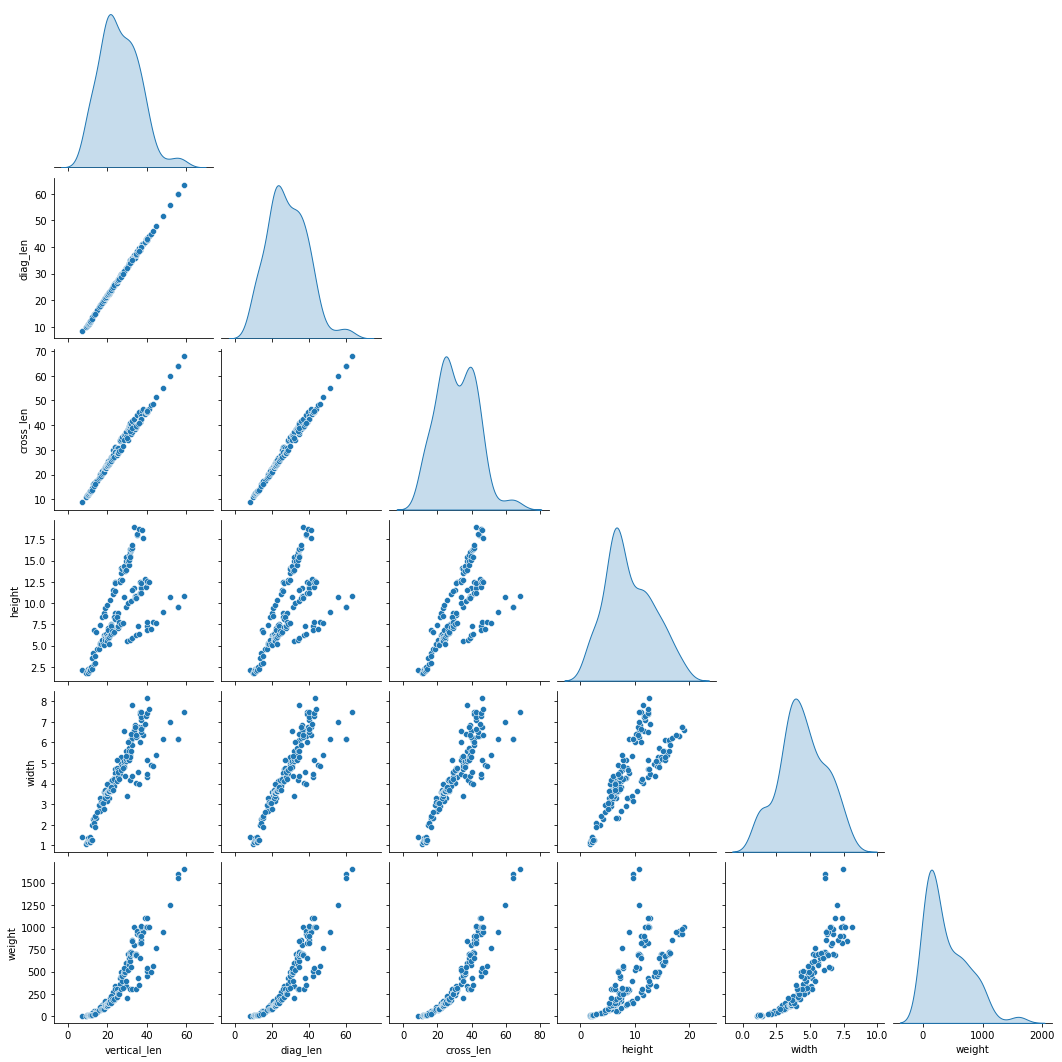

In [3]:
df_labeled = pd.read_csv('https://raw.githubusercontent.com/ja-nguyen/rcs-sklearn_workshop/main/datasets/Fish.csv')
sns.pairplot(df_labeled, kind="scatter", diag_kind='kde', corner=True)

### <br><span style="color:blue"> Question

What does the data suggest about the relationship between features and, consequently, modeling choices?

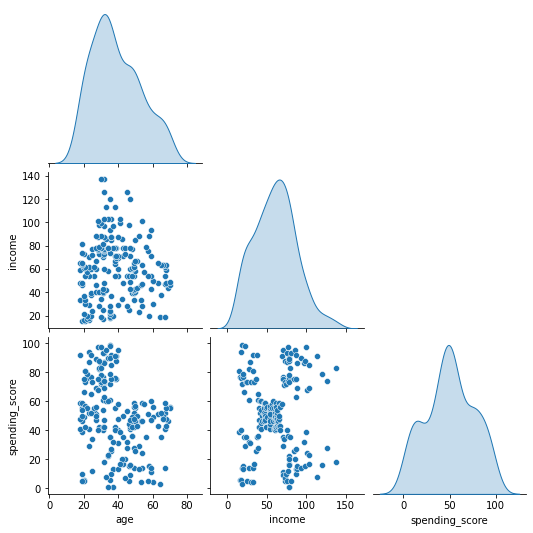

In [4]:
sns.pairplot(df, kind="scatter", diag_kind='kde', corner=True)

Customer segmentation is a common approach for organizations and businesses to understand their clients and make strategic decision regarding, for example, product development and marketing. 

Customer segmentation essentially means grouping your customers based on certain characteristics. This sounds like a task for K-means clustering!

## <br><span style="color:teal"> Preprocessing

Scaling is an important step in K-means clustering. Since the algorithm uses a distance measure to quantify similarities, scaling the data either to will improve the performance. 

In [5]:
df.describe()

age      income  spending_score
count  200.000000  200.000000      200.000000
mean    38.850000   60.560000       50.200000
std     13.969007   26.264721       25.823522
min     18.000000   15.000000        1.000000
25%     28.750000   41.500000       34.750000
50%     36.000000   61.500000       50.000000
75%     49.000000   78.000000       73.000000
max     70.000000  137.000000       99.000000

### <br><span style="color:blue"> Practice
Import the necessary packages and create a pipeline named preprocessor that store the StandardScaler().

In [2]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])


In [3]:
from sklearn.cluster import KMeans
model = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', KMeans(n_clusters=5, random_state=0))])

Suppose we want to do cluster analysis using 2 features, income and spending score

In [8]:
X = df[['income', 'spending_score']]

In [9]:
model.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

## <br><span style="color:teal">Access the model

In [10]:
# Inertia: sum of squared distances of samples to their closest cluster center
model['kmeans'].inertia_

65.56840815571681

In [11]:
# Label: indicating which cluster a point belong to. There isn't any ordinal meaning to the value of the labels. They are indices of clusters.
model['kmeans'].labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [12]:
# Cluster centers/centroids
model['kmeans'].cluster_centers_

array([[ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

### <br><span style="color:blue"> Practice

Do you see anthing odd about the cluster centers above? 

In [13]:
centroids = model['preprocessor'].inverse_transform(model['kmeans'].cluster_centers_)

In [13]:
plt.figure(figsize = (15, 10))
plt.scatter(df.iloc[:,1], df.iloc[:,2], c =
model['kmeans'].labels_, s = 105)
plt.scatter(centroids[:, 0],centroids[:, 1], color = 'red', s = 250)
plt.title('Customers clusters\n', fontsize = 20)
plt.xlabel('Income', fontsize=13)
plt.ylabel('Spending Score', fontsize=13)
plt.show()

### <br><span style="color:blue"> Practice

Let redo the cluster analysis with two features, age and spending score.

In [15]:
# X = df[['age', 'spending_score']]

In [16]:
# Fit the model


In [17]:
# Inverse transform the cluster centers


In [18]:
# Scatterplot

# plt.figure(figsize = (15, 10))
# plt.scatter(df.iloc[:,0], df.iloc[:,2], c =
# model['kmeans'].labels_, s = 105)
# plt.scatter(centroids[:, 0],centroids[:, 1], color = 'red', s = 250)
# plt.title('Customers clusters\n', fontsize = 20)
# plt.xlabel('Age', fontsize=13)
# plt.ylabel('Spending Score', fontsize=13)
# plt.show()

## <br><span style="color:teal">Evaluate model's performance
    
Performance metrics for unsupervised learning is not as straightforward as those for supervised learning. Some popular metrics are
    
1. Silhouette Coefficient: defined for each sample. The coefficient is given by
$$
s = \frac{b-a}{\max{(a,b)}}
$$
where 
- a: the mean distance between a sample and all other points in the same class.
- b: the mean distance between a sample and all other points in the next nearest cluster.

The coefficient is between -1 and 1, where

 - +1: the data point is optimally positioned as it far away from the neighboring cluster.

 - 0: the data point is either on or very close to the decision boundary between two neighbor clusters.

 - -1: the data point is assigned to the wrong cluster. 
    
The Silhouette Coefficient for a dataset is given as the mean of the Silhouette Coefficient for each sample.
    
The score is higher when clusters are dense and well separated.

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(X, model['kmeans'].labels_)

0.553931997444648

2. Variance Ratio Criterion (Calinski-Harabasz Index)

Define dispersion as the sum of distances squared. The variance ratio is given by
$$
s = \frac{\sum \text{between-clusters dispersion}}{\sum \text{within-cluster dispersion}}
$$

The score is higher when clusters are dense and well separated.

In [20]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, model['kmeans'].labels_)

247.35899338037282

3. Davies-Bouldin Index

Define similarity measure $R_{ij}$ between cluster $i$ and $j$ as
$$
R_ij = \frac{s_i + s_j}{d_{ij}}
$$
- $s_i$: cluster diameter, i.e. the average distance between each point of cluster $i$ and the centroid of that cluster.
- $d_{ij}$: the distance between cluster centroids $i$ and $j$.

For each cluster $i$, we want to find the maximum $R_i^* = \max{R_{ij}}$.

The index is then given by
$$
s = \frac{1}{K} \sum R_i^*
$$

Zero is the lowest possible score and corresponds to low similarity, if at all. The index is lower when a model has better separation between the clusters.

In [21]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, model['kmeans'].labels_)

0.5725628995597086

## <br><span style="color:teal">Choosing the right number of clusters
    
Cross validation can be used to tune model hyperpameters. 
    
### <br><span style="color:blue"> Practice
Can we use CV to tune the number of clusters in $K$-means clustering?

#### Elbow method

Vary the number of clusters and record the inertia. Find the value of $K$ beyond which the inertia doesn't decrease as fast.

In [22]:
range_clusters = np.arange(2,15,1)

In [23]:
inertia = []
for n in range_clusters:
    model = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', KMeans(n_clusters=n, random_state=0))])
    model.fit(X)
    inertia.append(model['kmeans'].inertia_)

In [12]:
plt.figure(figsize=(12,6))
plt.plot(range_clusters, inertia, '-o', linewidth=3, markersize=10)
plt.xlabel('Number of clusters $K$', fontsize=15)
plt.ylabel('Inertia/ within-cluster sum of squares', fontsize=15)
plt.title('Elbow method', fontsize=20)
plt.grid(True)

It is reasonable to pick $K=5$ to be the optimal number of clusters for this case. As we increase $K$ beyond 5, there isn't as much significant change in the inertia. 

#### Silhouette method

Vary the number of clusters and record the silhouette score of the enter dataset. Find the value of $K$ where the score is the highest.

In [25]:
silhouette = []
for n in range_clusters:
    model = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', KMeans(n_clusters=n, random_state=0))])
    model.fit(X)
    silhouette.append(silhouette_score(X, model['kmeans'].labels_))

In [11]:
plt.figure(figsize=(12,6))

plt.plot(range_clusters,silhouette, '-o', linewidth=3, markersize=10)
plt.xlabel('Number of clusters $K$', fontsize=15)
plt.ylabel('Silhouette score', fontsize=15)
plt.title('Silhouette method', fontsize=20)
plt.grid()

# <br><br><span style="color:rebeccapurple">Additional materials - Image compression</span>

$K-means clustering can also be used for image compression. It is indeed a lossy compression technique, which finds the most representative component of the image and gets rid of the less critical parts. The original image cannot be reconstructed after the compression, however.

An RBG image consists of three color channels, red, green and blue, and each channel has integer values in the range (0,255). An image is stored as an m-by-n-by-3 array that corresponds to the height, width and the number of channels.

<div>
<center><img src="figures/image.jpeg" width="500"/>
<center> Source: <a href="https://commons.wikimedia.org/wiki/File:Hong_Thai.jpg"> Website</a>

Image compression using $K$-means clustering involves:
- grouping the pixels into $K$ clusters and obtaining $K$ centroids
- replacing the color channel combination of each pixel in a cluster with that of the centroid
    

In [4]:
from matplotlib.image import imread

In [18]:
## If you're running on Google Colab, please uncomment these two lines.
# !wget https://raw.githubusercontent.com/ja-nguyen/rcs-sklearn_workshop/main/figures/image.jpeg
# img = imread('image.jpeg')

## If you're running on Google Colab, please comment out this line.
img = imread('figures/image.jpeg')
img_size = img.shape
print(img_size)

(282, 512, 3)


If we reshape the array, we can obtain a tabular format of data with each column corresponding to a color channel and each row corresponding to a pixel.

In [20]:
X = img.reshape(-1, img_size[2])
X.shape

In [21]:
# We can check the number of unique pixel, or essentially unique combinations of the three color channels.
len(np.unique(X, axis=0))

## <br><span style="color:teal">$K$-means clustering

In [8]:
km = KMeans(n_clusters=20)
km.fit(X)

KMeans(n_clusters=20)

In [23]:
# You obtain $K$ centroids
km.cluster_centers_

In [24]:
# You also obtain the assignments of pixels to clusters
km.labels_

## <br><span style="color:teal">Assign pixels to centroids

In [11]:
# Replacing a pixel's color information with that of its centroid
X_comp = km.cluster_centers_[km.labels_]

In [12]:
len(np.unique(X_comp, axis=0))

20

In [13]:
# Convert the array into the original dimensions
img_comp = X_comp.reshape(img_size[0], img_size[1], img_size[2])

In [22]:
img_comp[0]

In [15]:
# Last step:
# Convert the entries in the array to 'uint8' datatype to be compatible with the 8-bit color graphics
img_comp = img_comp.astype('uint8')
# Ensuring that each entry is in the range (0, 255) afterwards.
img_comp = np.clip(img_comp, 0, 255)

In [28]:
figre, axs = plt.subplots(1, 2, figsize = (25, 10))
axs[1].imshow(img)
axs[1].set_title('Original image', fontsize=20)
axs[0].imshow(img_comp)
axs[0].set_title('Compressed image', fontsize=20)
for axs in figre.axes:
    axs.axis('off')